Setups

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import img_as_float

K-Means Clustering

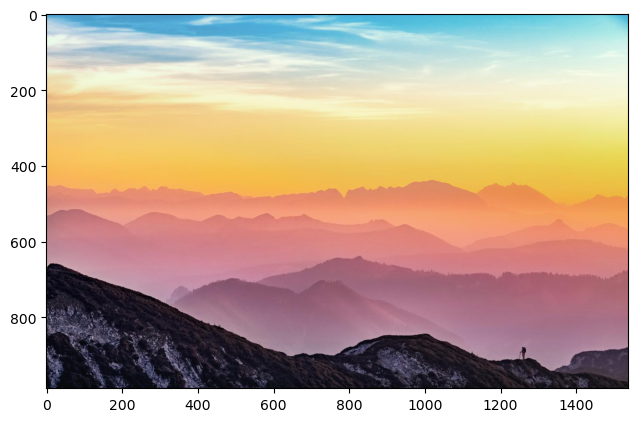

In [2]:
#load the pic
image = img_as_float(io.imread('data/resources/sunset.jpg'))
#plot
plt.figure(figsize=(7.5, 5))
plt.imshow(image)
plt.show()

Ready for k=means clustering

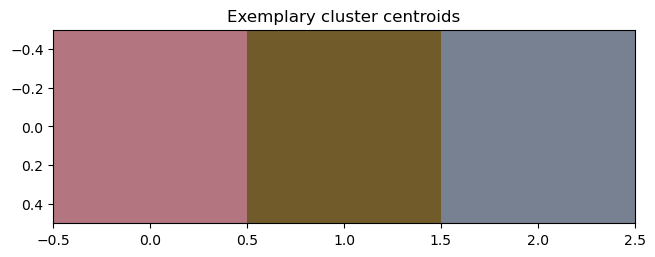

In [3]:
def initialize_clusters(K):
    rng = np.random.default_rng()
    #creat a random number generator which is specially used in this function
    cluster_centroids = rng.uniform(0.0, 1.0, size=(K, 3))
    #pixels are already in [0,1], with rgb, we need 3 dimension data to represent every pixel value
    return cluster_centroids

cluster_centroids = initialize_clusters(3)
#visualize
plt.figure(figsize=(7.5, 5))
plt.imshow(cluster_centroids.reshape(1,-1,3))
#-1 means automatically calculate the number of columns , here is K
#so we reshape the kx3 array to 3xk array
plt.title("Exemplary cluster centroids")
plt.show()

Assign the pixels into the centroids

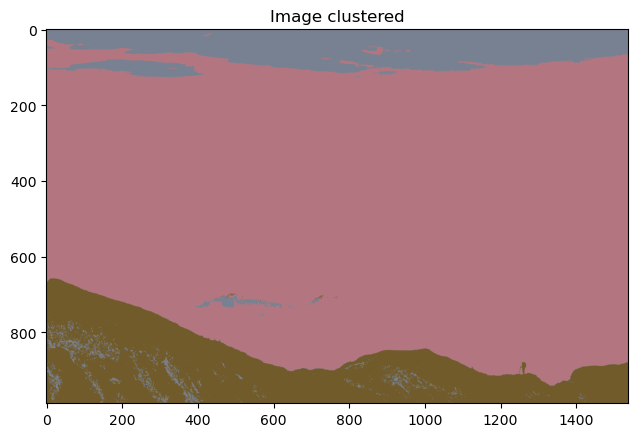

In [5]:
def assign_clusters(image, cluster_centroids):
    cluster_distances = np.empty((image.shape[0], image.shape[1], cluster_centroids.shape[0]))
    #result is [height,width,k], place of k will be replaced by the distance, place of height and width will be the location
    for i, cluster_centroid in enumerate(cluster_centroids):
        cluster_distances[:, :, i] = np.sqrt(np.sum(np.square(image - cluster_centroid), axis=2))
        #i=k, here we save all the distances in 3rd dimension
    image_clusters = np.argmin(cluster_distances, axis=2)
    #return the minimum distance, which represent the cluster
    #it is a array same size as the pic, and all the elements are the cluster index
    return image_clusters

image_clusters = assign_clusters(image, cluster_centroids)
image_clustered = cluster_centroids[image_clusters]

plt.figure(figsize=(7.5, 5))
plt.imshow(image_clustered)
plt.title("Image clustered")
plt.show()

Iteration:

1. Initialize the K cluster centroids
2. Perform the iterative K-means clustering algorithm
    1. Perform the clustering (assignment) using the current cluster centroids
    2. Update the cluster centroids to the mean value of each cluster
3. Return the clustered image and the cluster centroids

Perform K-means clustering with 10 classes and 100 iterations.

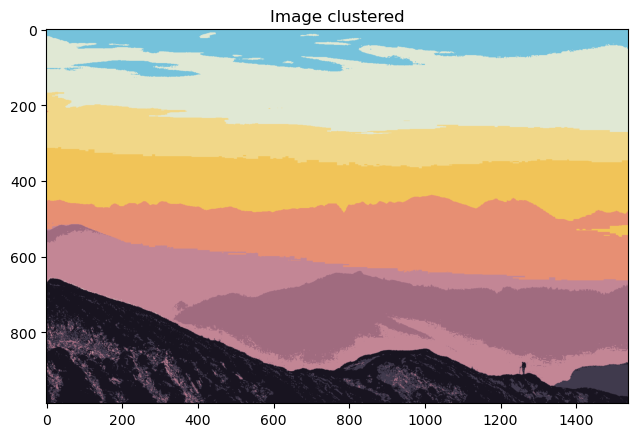

In [6]:
def k_means_clustering(image, K, iterations):
    cluster_centroids = initialize_clusters(K)
    for i in range(iterations):
        image_clusters = assign_clusters(image, cluster_centroids)
        for cluster_index in range(cluster_centroids.shape[0]):
            values = image[image_clusters == cluster_index]
            #with loop and bool, we can separate all the pixels with same clusters
            if values.size > 0:
                cluster_centroids[cluster_index] = np.mean(values, axis=0)
    image_clusters = assign_clusters(image, cluster_centroids)
    return image_clusters, cluster_centroids

image_clusters, cluster_centroids = k_means_clustering(image, 10, 100)
image_clustered = cluster_centroids[image_clusters]

plt.figure(figsize=(7.5, 5))
plt.imshow(image_clustered)
plt.title("Image clustered")
plt.show()
#as we are calculating every pixel's distance to k centroids in rgb, do needs a lot of calculation
#it takes a while

When we have some luck, it might not need 100 iteration to get a good result.

so here we do a early stop function

Early stop after 54 iterations


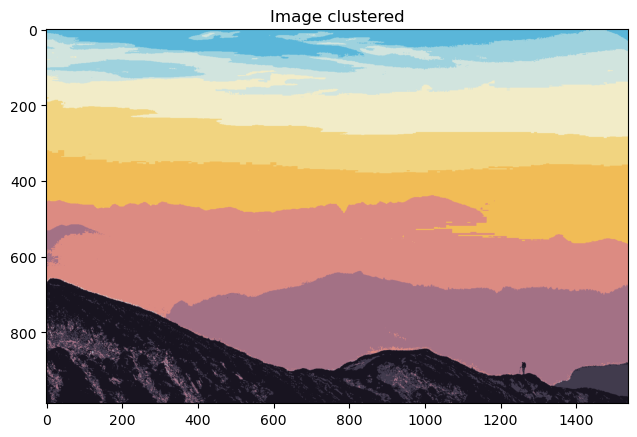

In [7]:
def k_means_clustering_earlystop(image, K, max_iterations):
    cluster_centroids = initialize_clusters(K)
    for i in range(max_iterations):
        image_clusters = assign_clusters(image, cluster_centroids)
        
        # Track the new cluster centroids
        new_cluster_centroids = np.empty(cluster_centroids.shape)
        
        for cluster_index in range(cluster_centroids.shape[0]):
            values = image[image_clusters == cluster_index]
            if values.size > 0:
                new_cluster_centroids[cluster_index] = np.mean(values, axis=0)
        
        # Check whether the cluster centroids changed
        if np.all(new_cluster_centroids == cluster_centroids):
            print(f"Early stop after {i} iterations")
            break
            
        # Assign the new cluster centroids to the final cluster centroids
        cluster_centroids = new_cluster_centroids
        
    image_clusters = assign_clusters(image, cluster_centroids)
    return image_clusters, cluster_centroids

image_clusters, cluster_centroids = k_means_clustering_earlystop(image, 10, 100)
image_clustered = cluster_centroids[image_clusters]

plt.figure(figsize=(7.5, 5))
plt.imshow(image_clustered)
plt.title("Image clustered")
plt.show()